# One-number metric (Wasserstein distance?)

In [1]:
from train_test_utils import LossDistribution

In [19]:
import os
from typing import List
import matplotlib.pyplot as plt

In [2]:
def all_plots_for_datafile(filepath: str) -> None:
    l = LossDistribution(filepath)
    l.plot_learning_curves()
    for epoch in [0, 5, 10, 20, 30]:
        l.plot_distribution_at_epoch(epoch)
    # l.plot_wasserstein_vs_epoch()
    l.plot_relmeandiff_vs_epoch()
    l.plot_lqrtest_pvalue_vs_epoch()

## lorenz_size=13_window_len=5

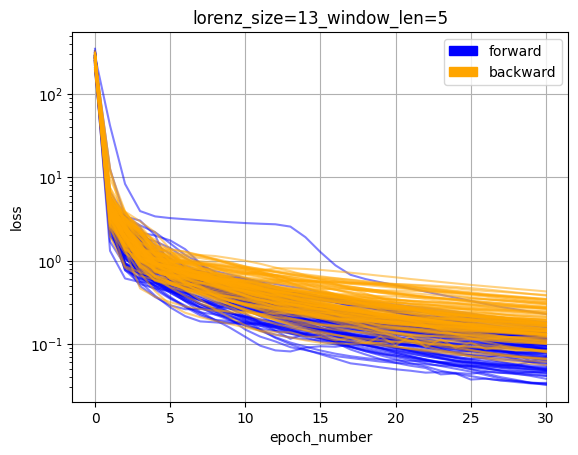

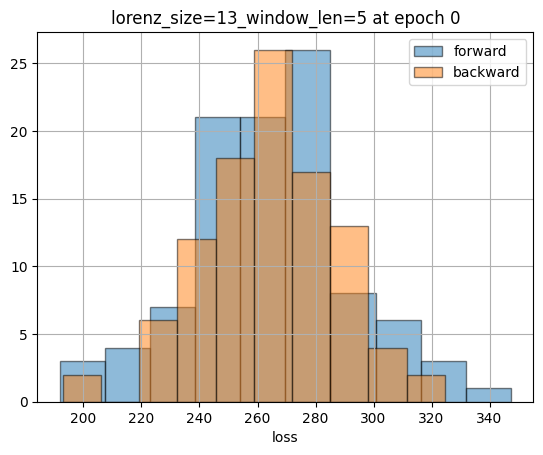

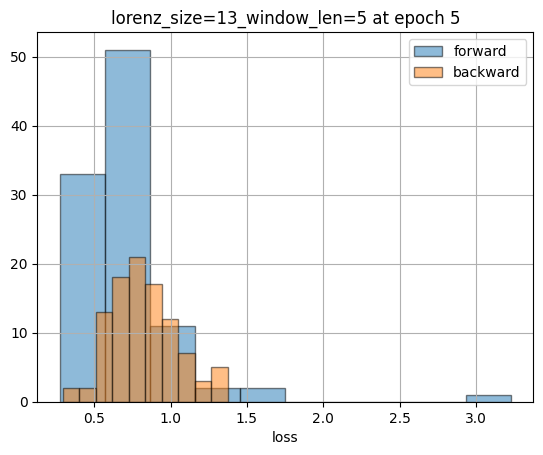

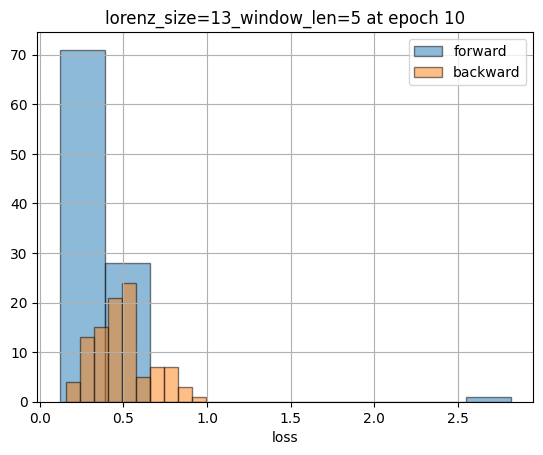

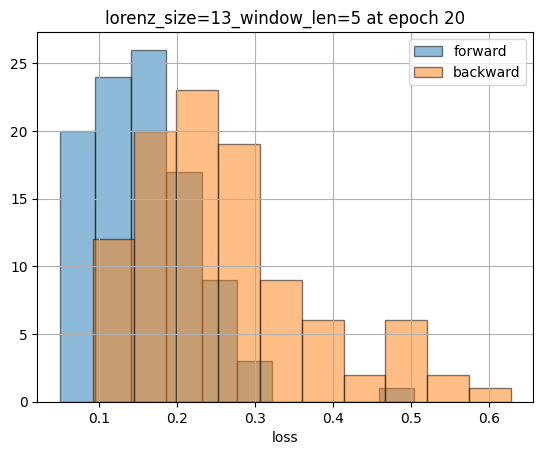

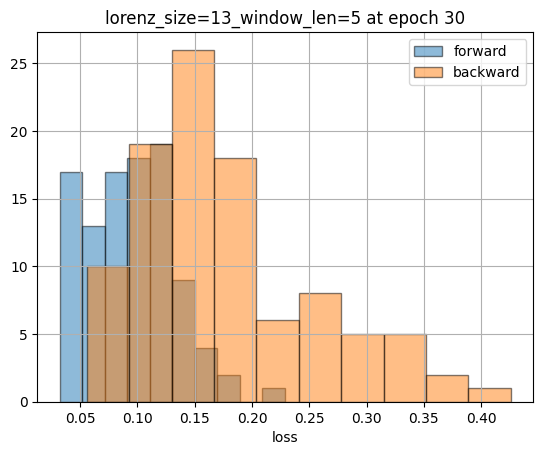

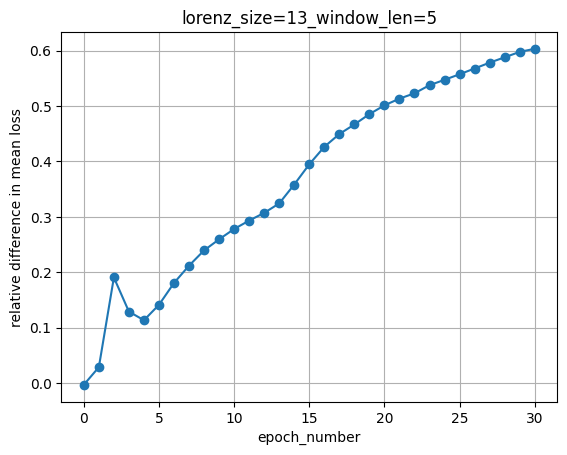

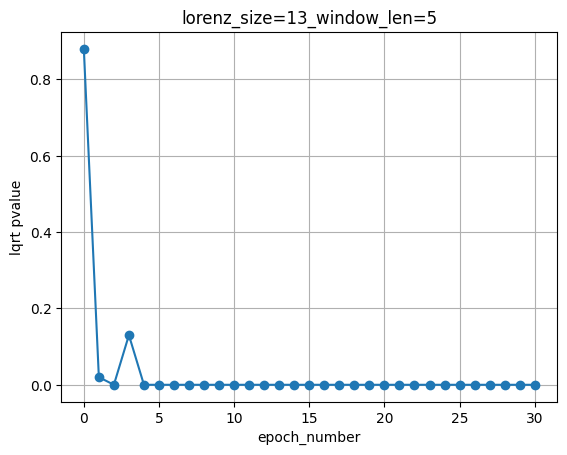

In [3]:
all_plots_for_datafile("20230507_distributions/lorenz_size=13_window_len=5.json")

## lorenz_size=13_window_len=12

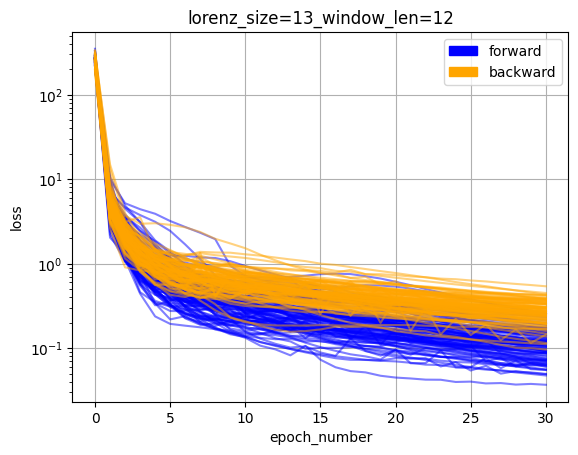

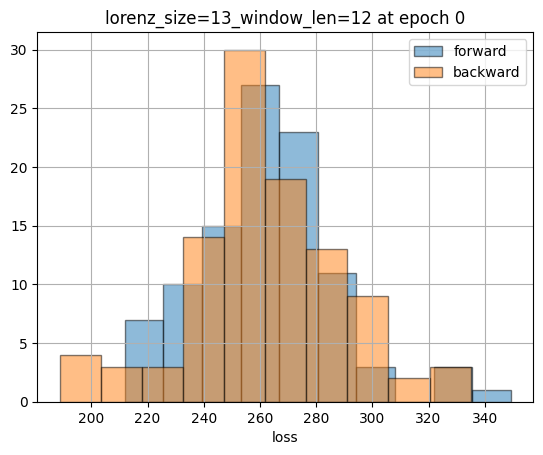

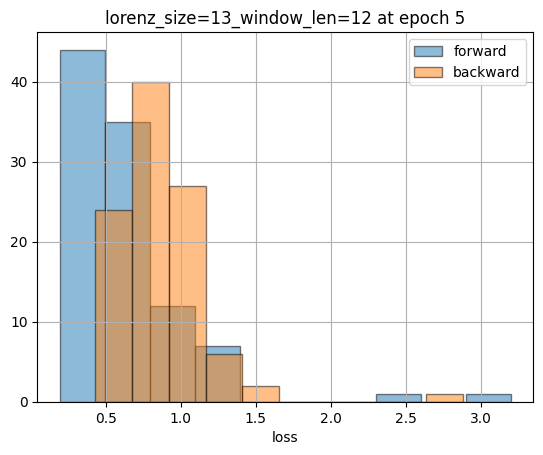

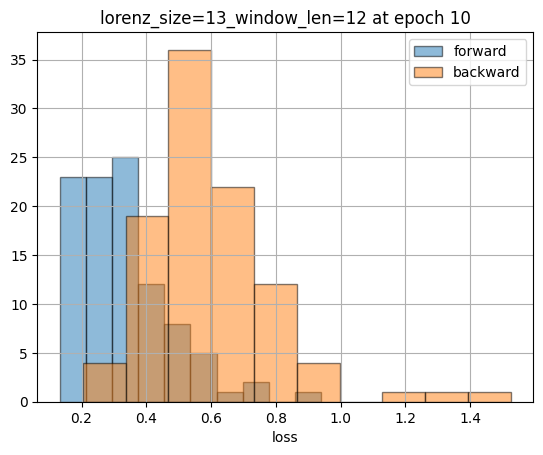

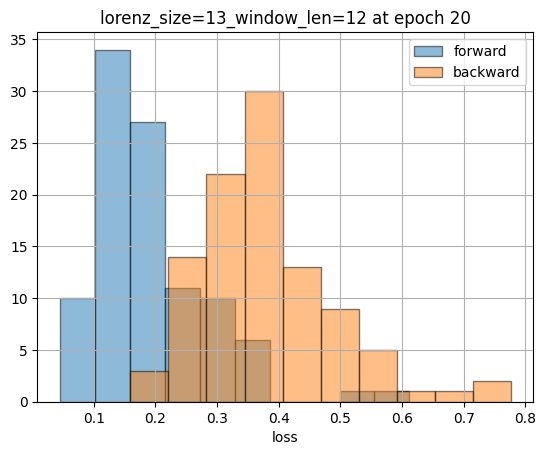

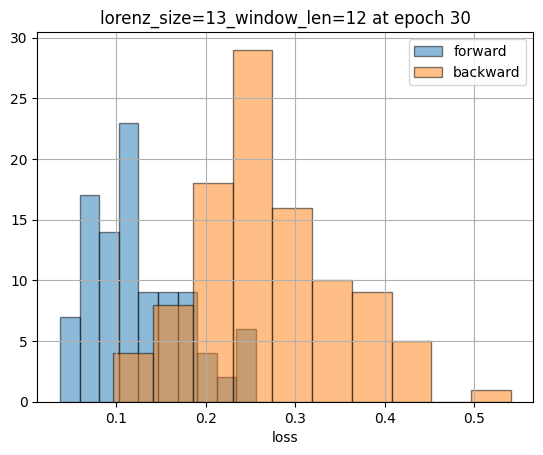

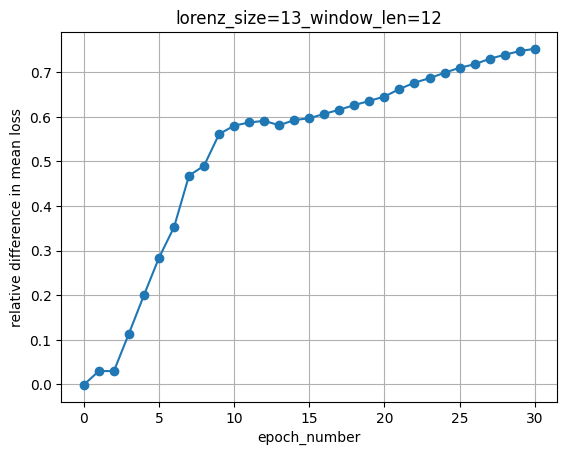

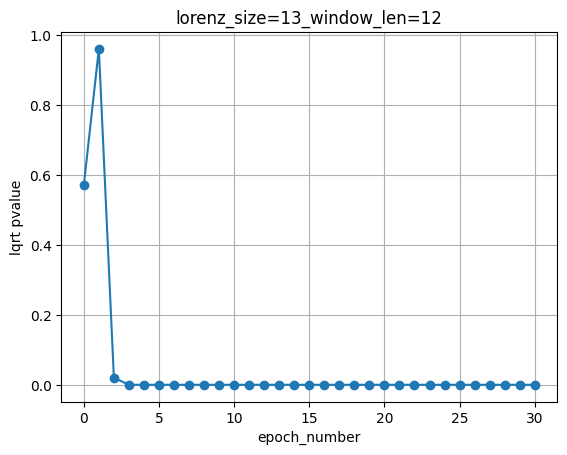

In [4]:
all_plots_for_datafile("20230507_distributions/lorenz_size=13_window_len=12.json")

## lorenz_size=13_window_len=25

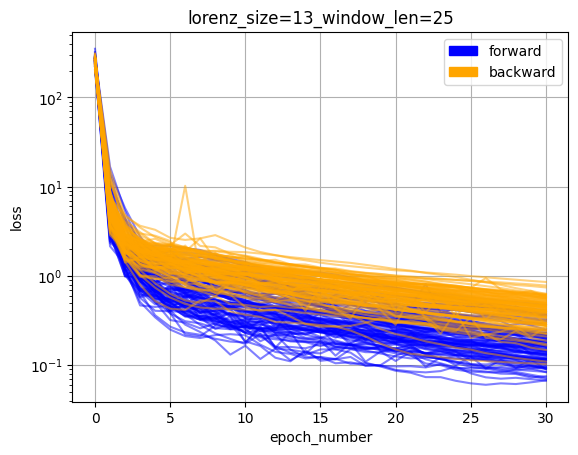

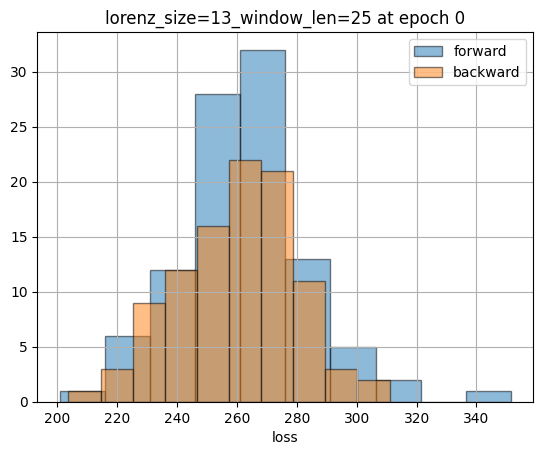

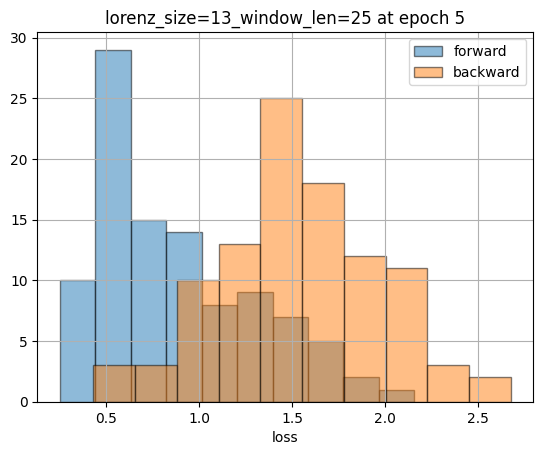

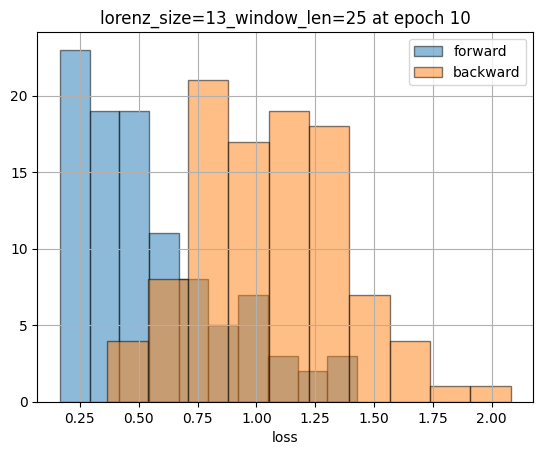

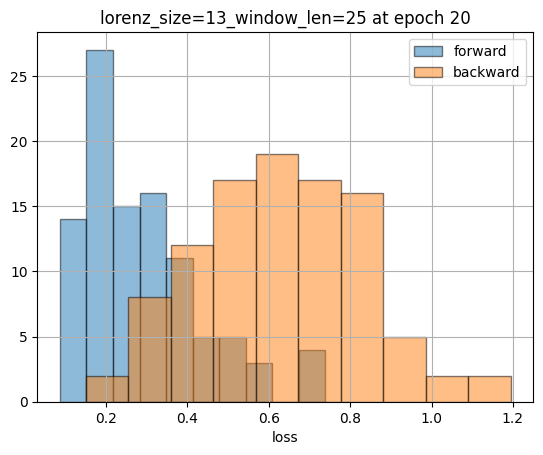

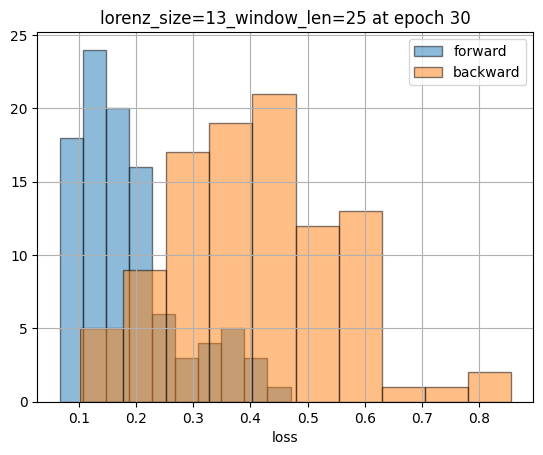

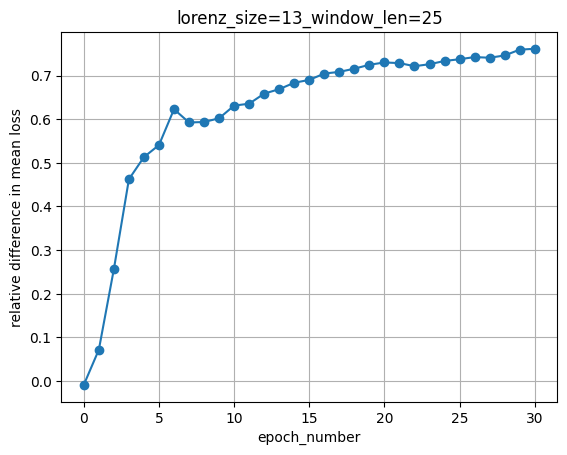

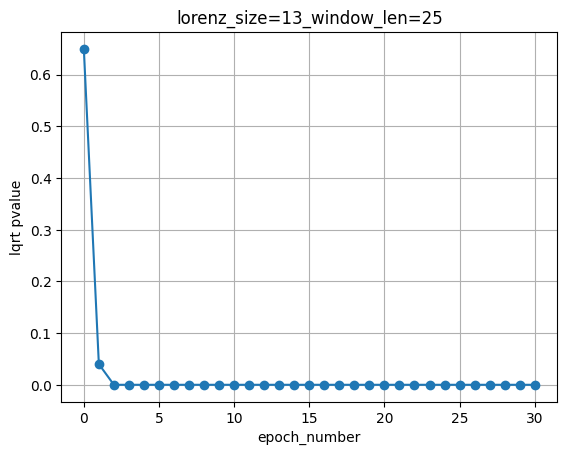

In [5]:
all_plots_for_datafile("20230507_distributions/lorenz_size=13_window_len=25.json")

## kepler_size=13_window_len=5

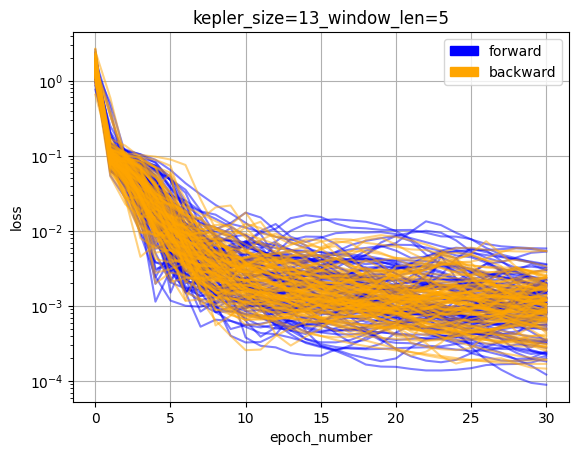

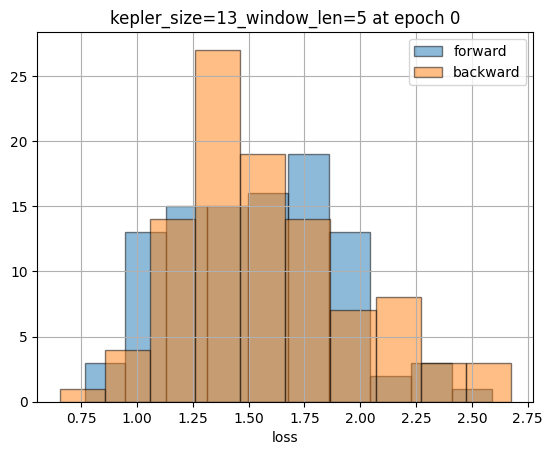

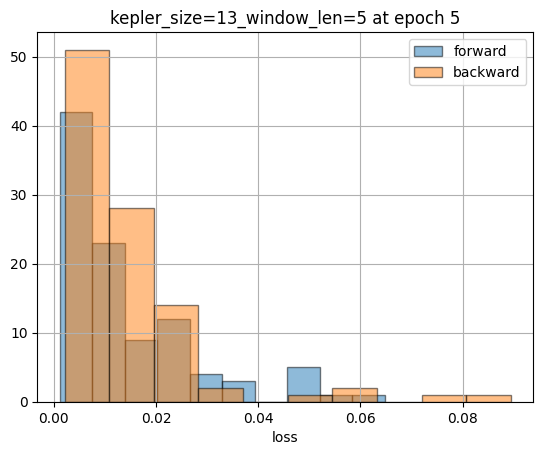

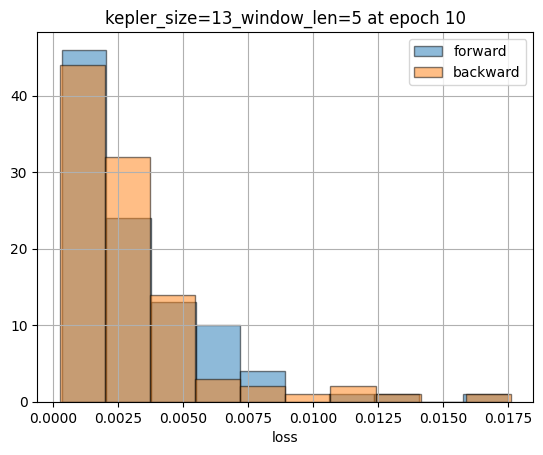

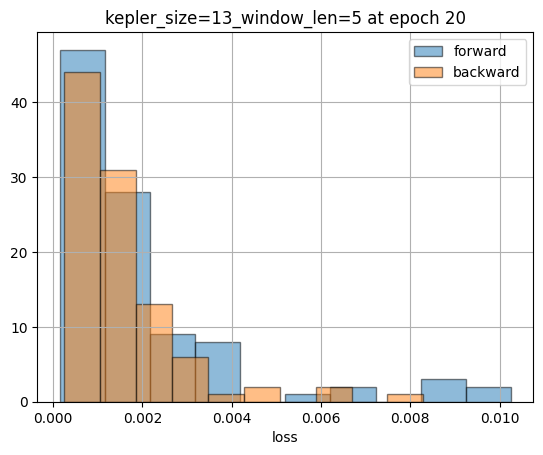

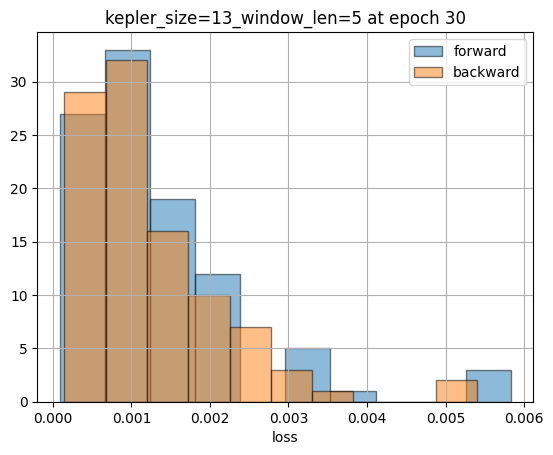

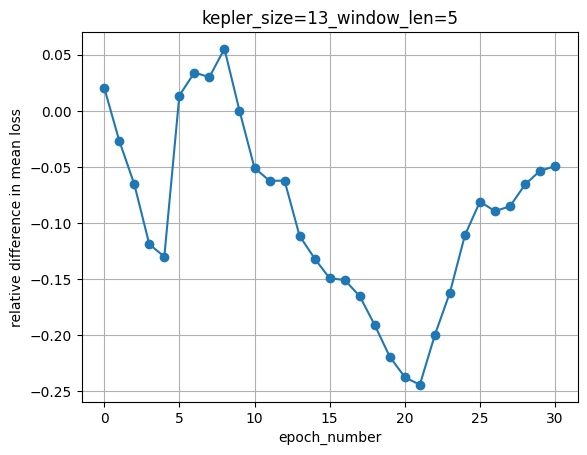

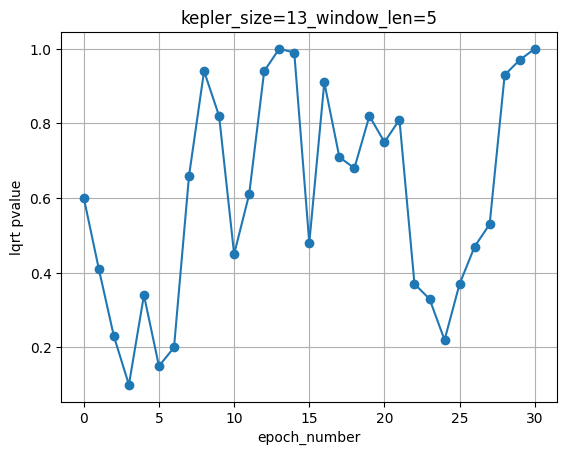

In [6]:
all_plots_for_datafile("20230507_distributions/kepler_size=13_window_len=5.json")

## kepler_size=13_window_len=12

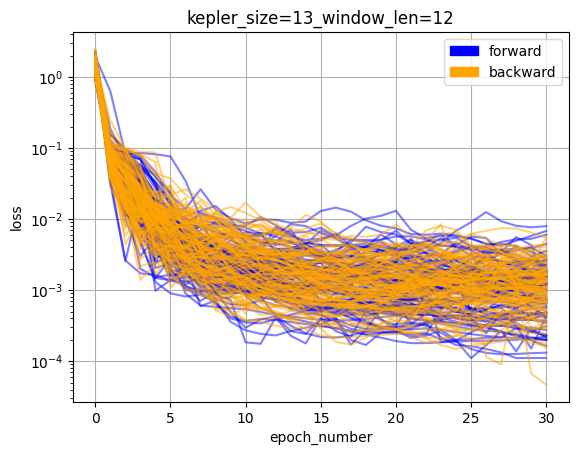

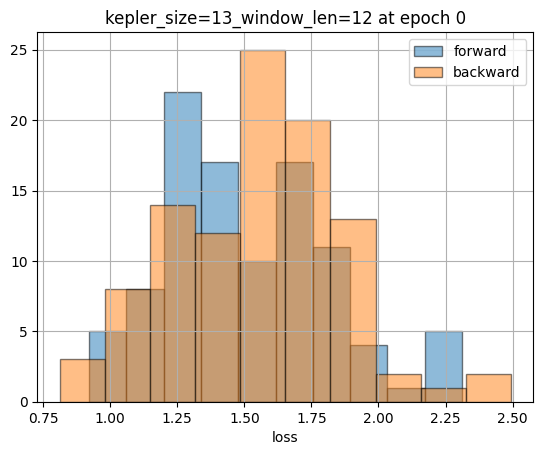

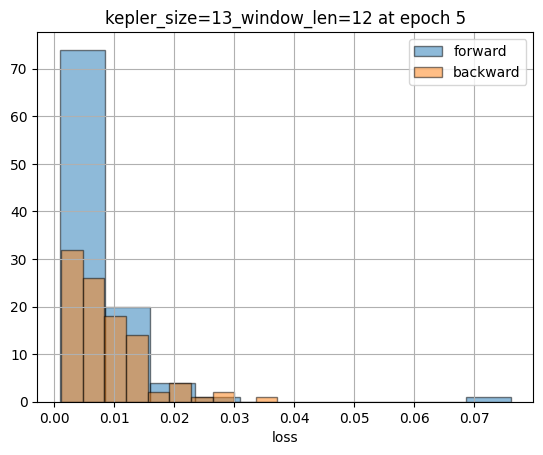

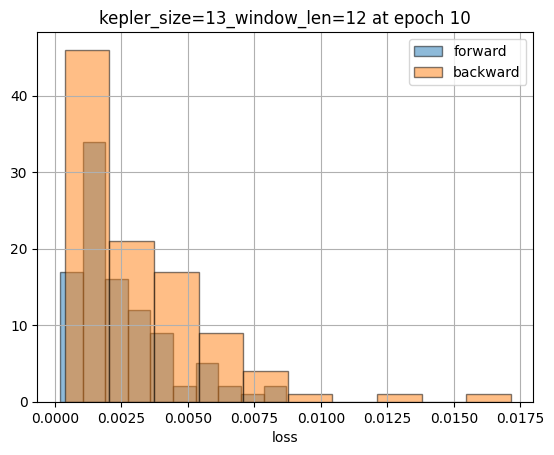

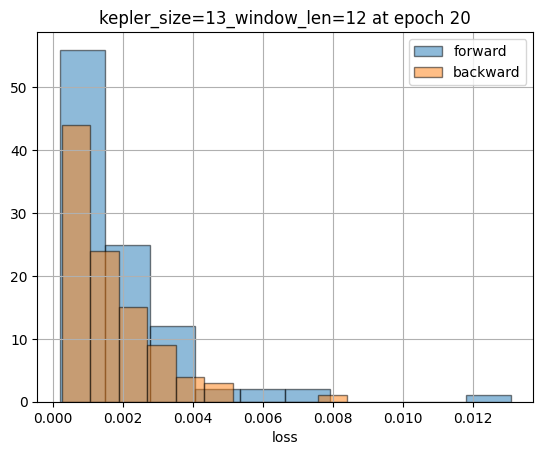

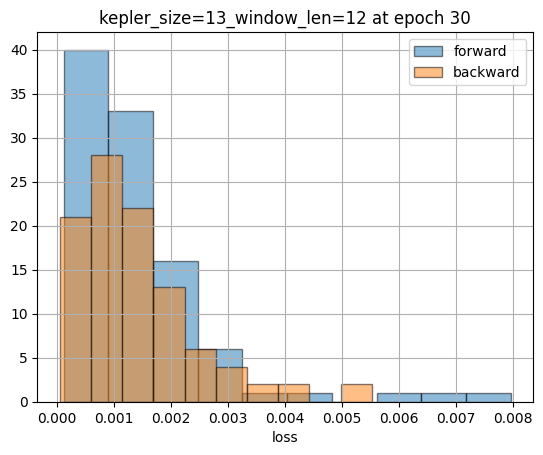

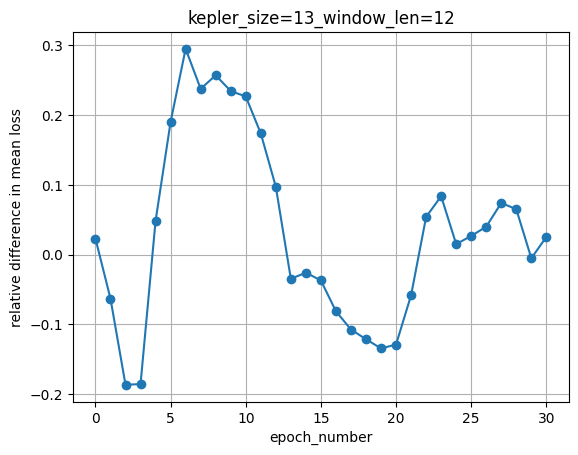

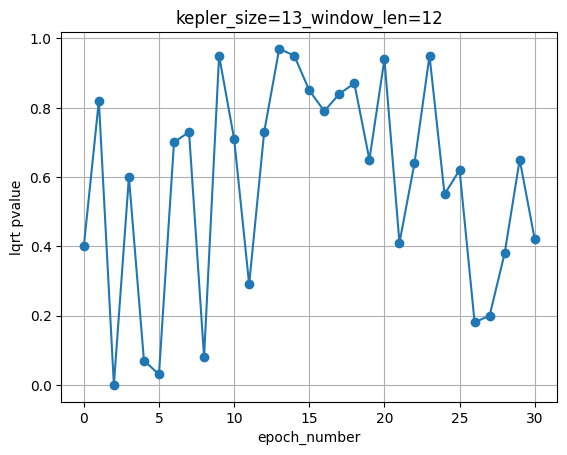

In [7]:
all_plots_for_datafile("20230507_distributions/kepler_size=13_window_len=12.json")

## kepler_size=13_window_len=25

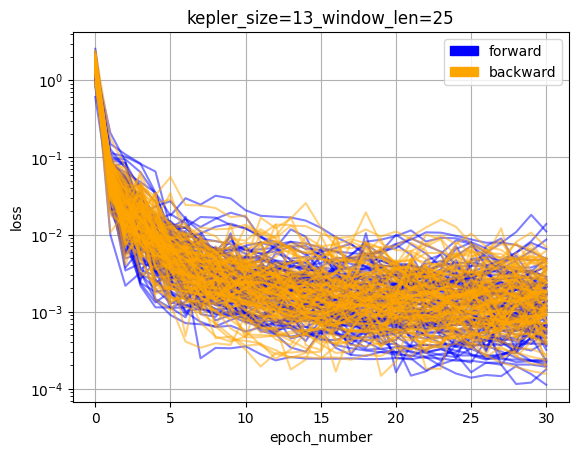

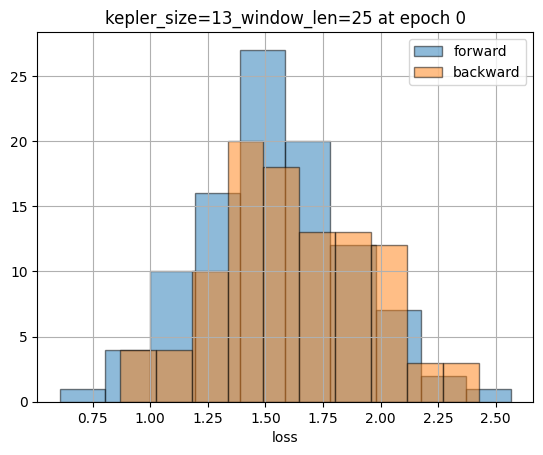

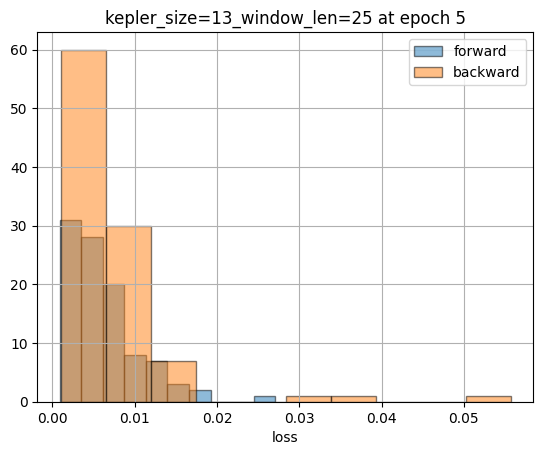

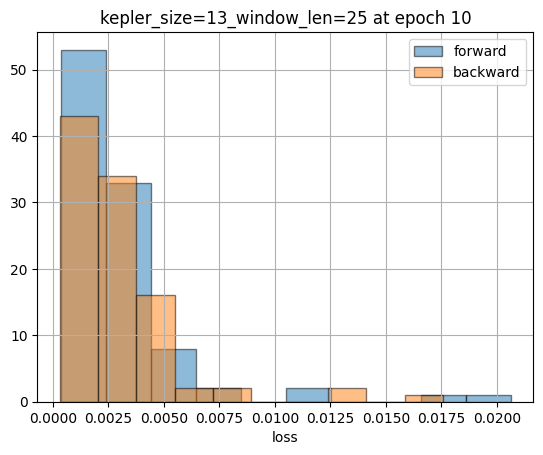

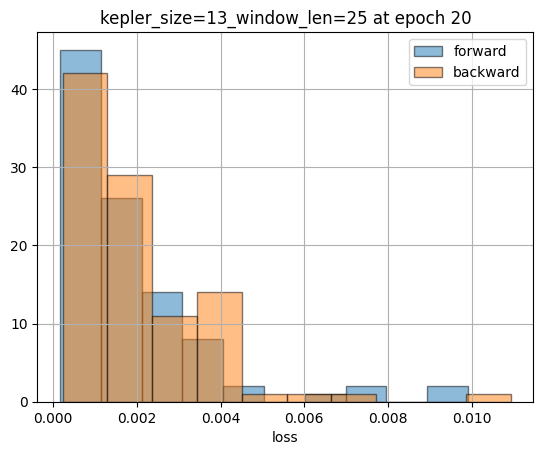

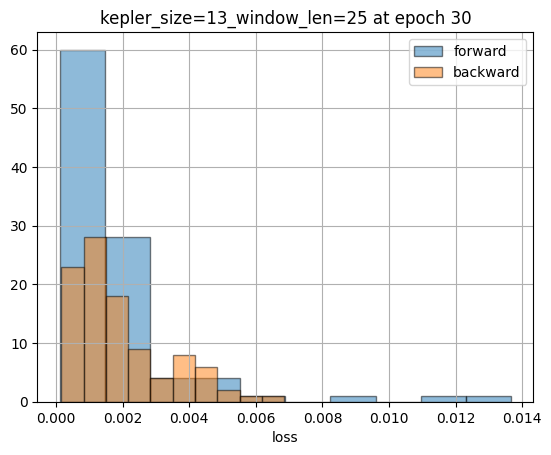

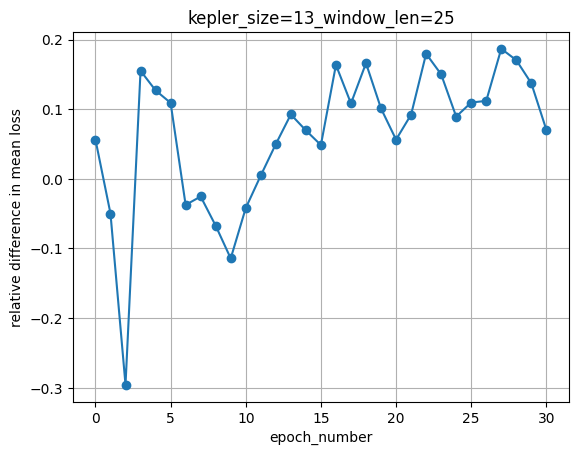

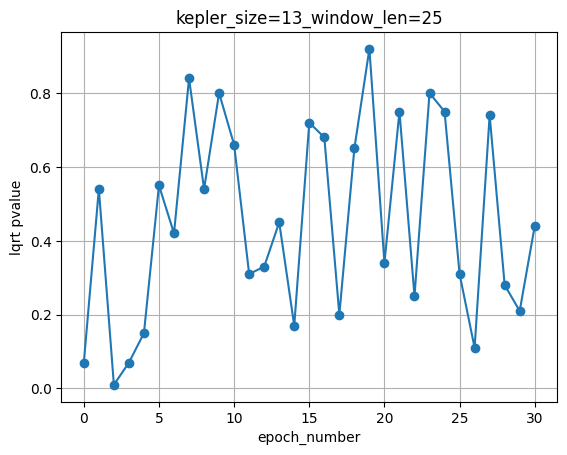

In [8]:
all_plots_for_datafile("20230507_distributions/kepler_size=13_window_len=25.json")

## belousovzhabotinsky_size=13_window_len=5

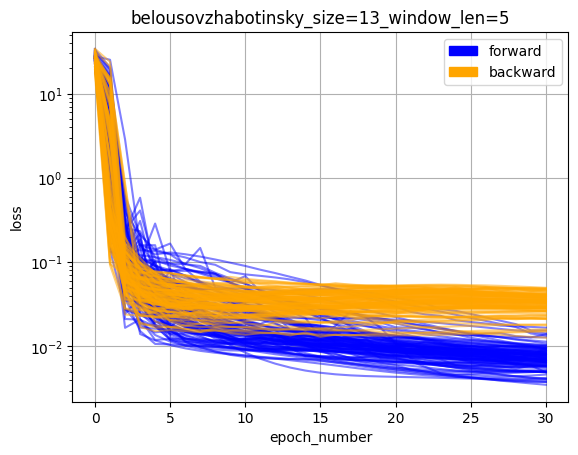

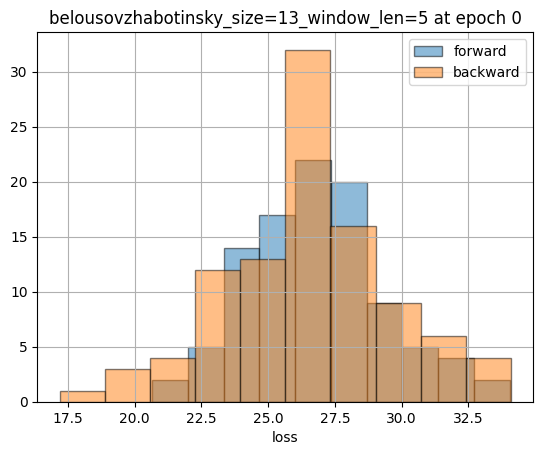

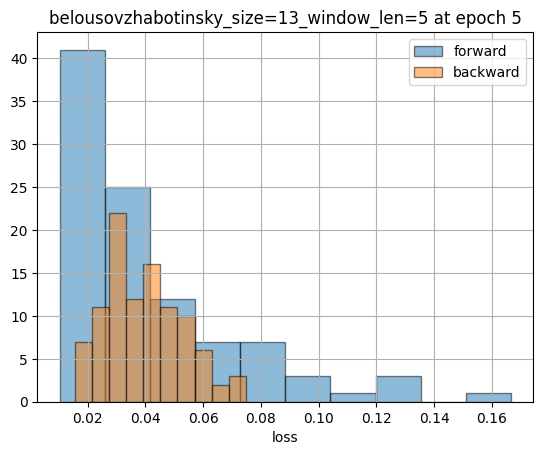

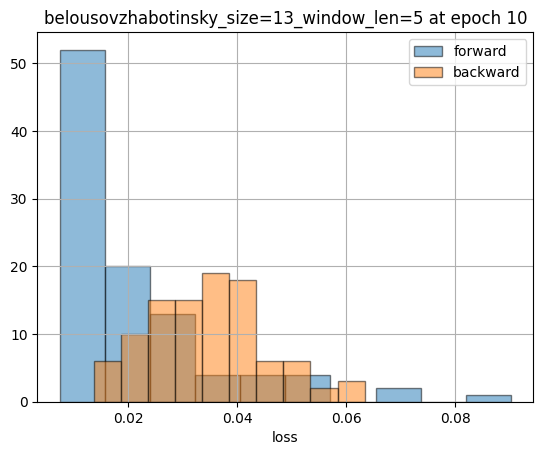

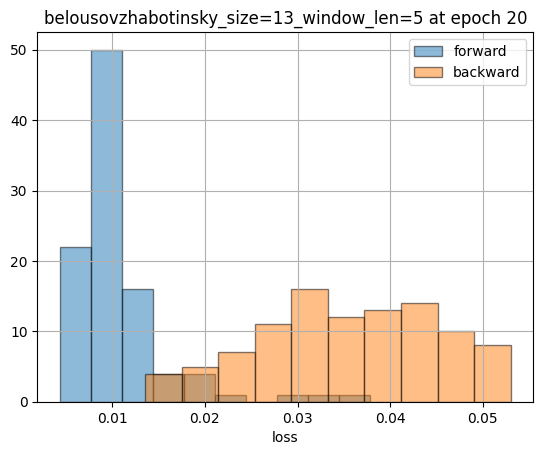

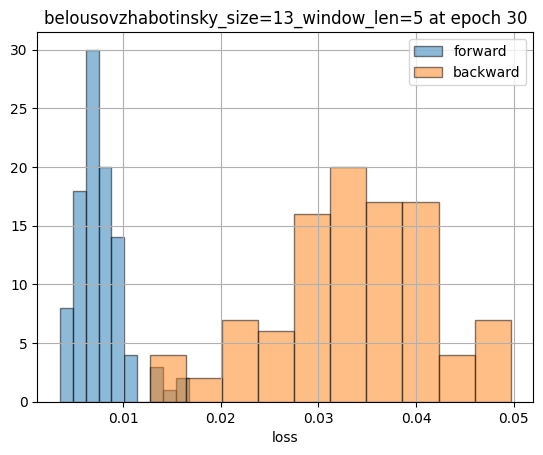

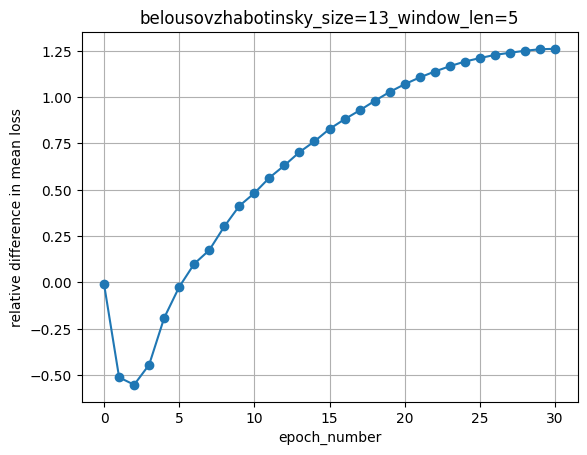

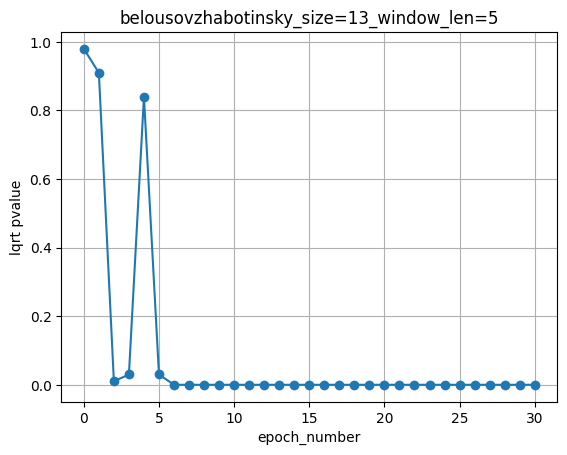

In [9]:
all_plots_for_datafile("20230507_distributions/belousovzhabotinsky_size=13_window_len=5.json")

## belousovzhabotinsky_size=13_window_len=12

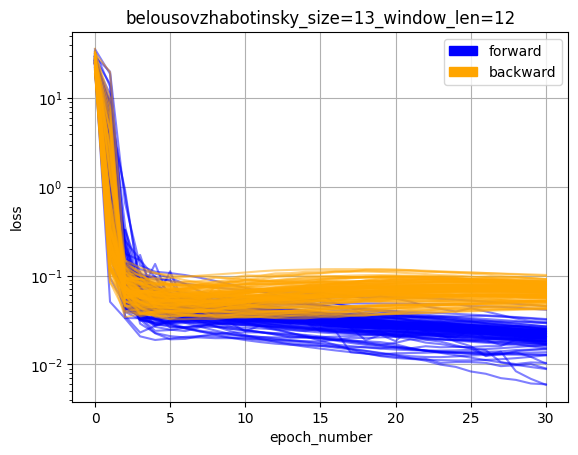

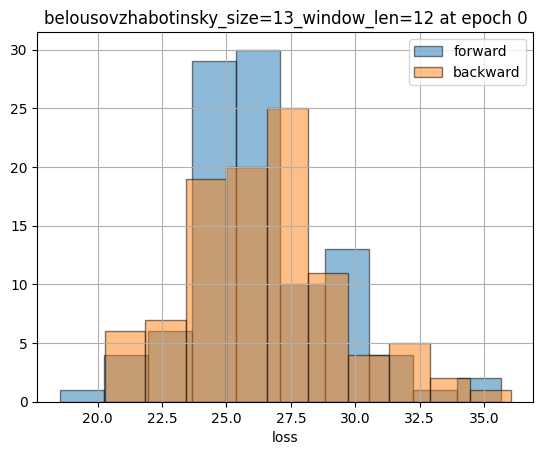

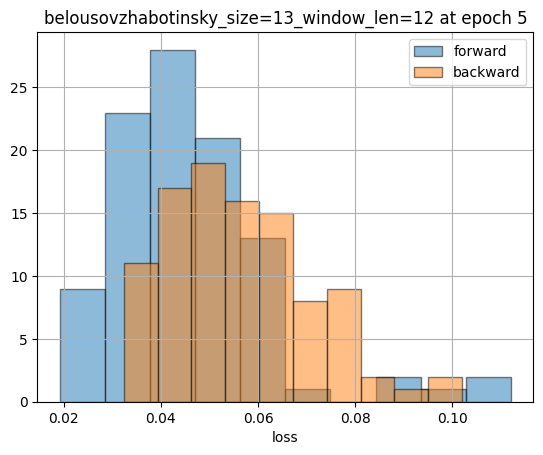

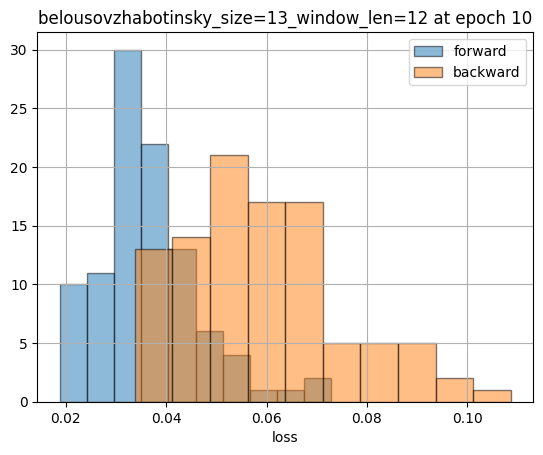

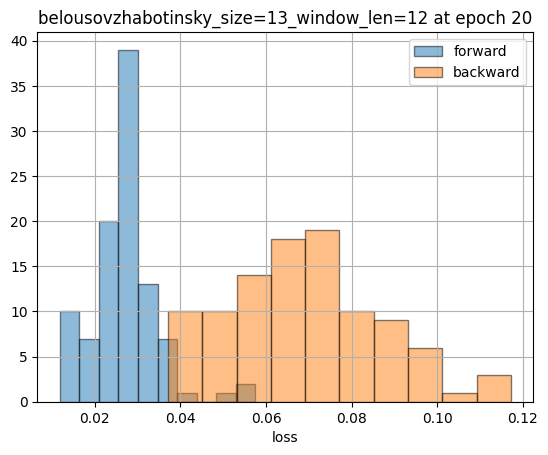

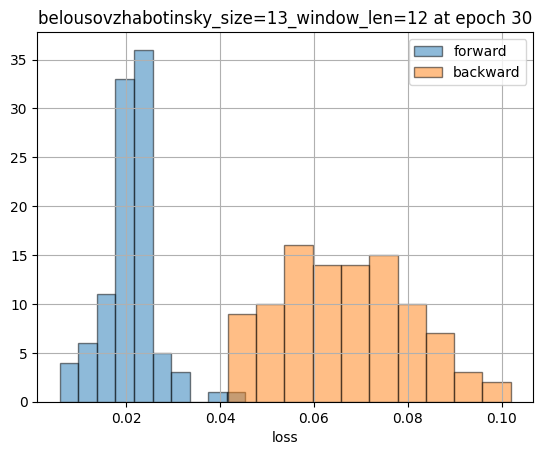

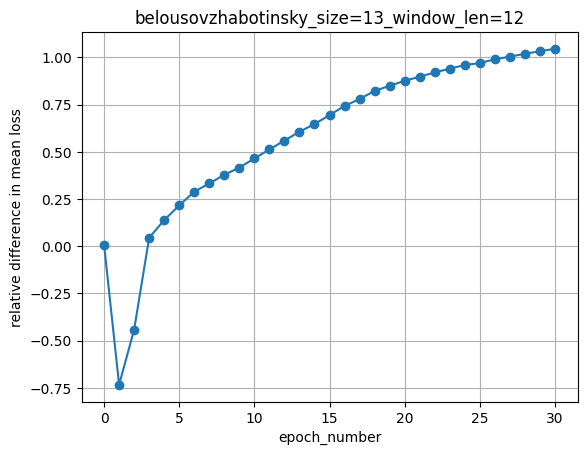

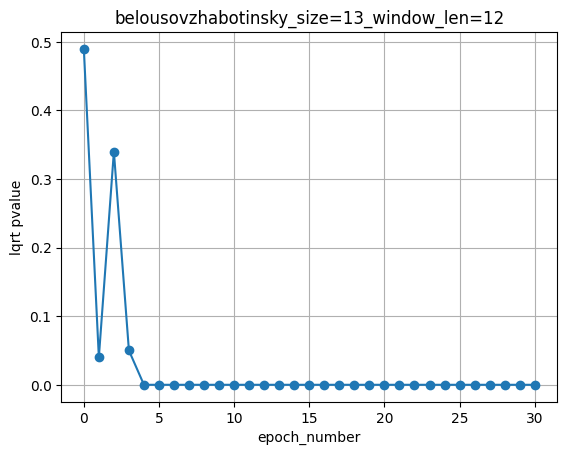

In [10]:
all_plots_for_datafile("20230507_distributions/belousovzhabotinsky_size=13_window_len=12.json")

## belousovzhabotinsky_size=13_window_len=25

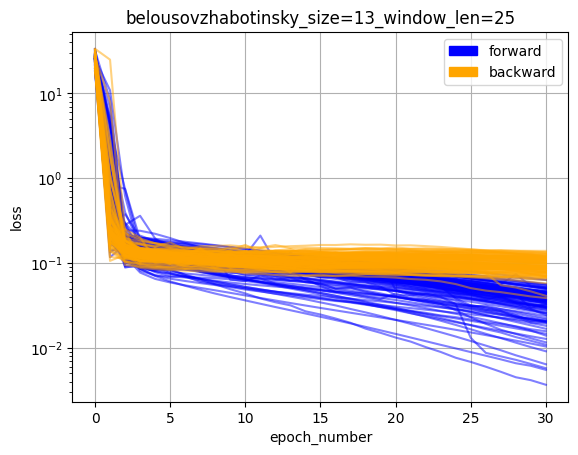

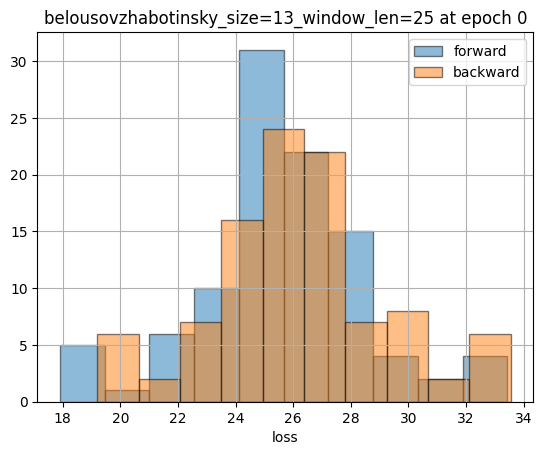

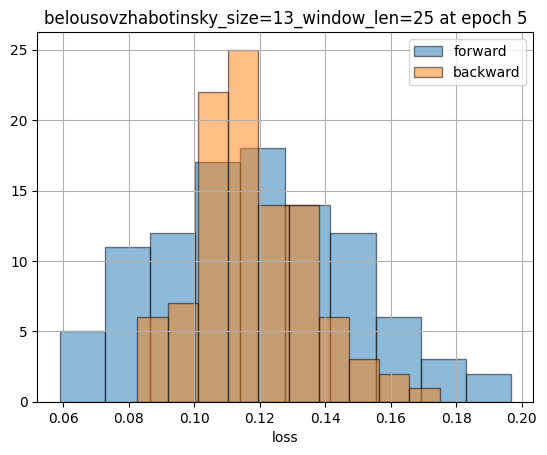

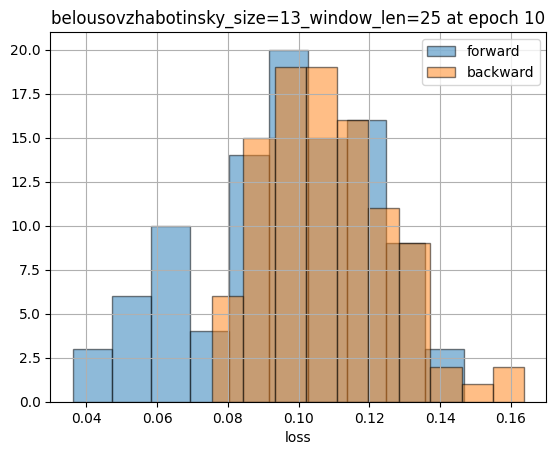

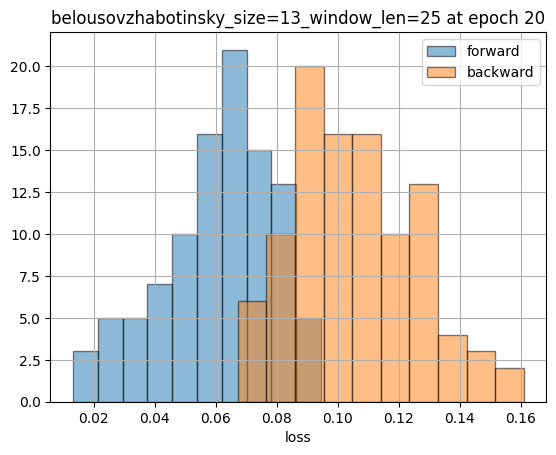

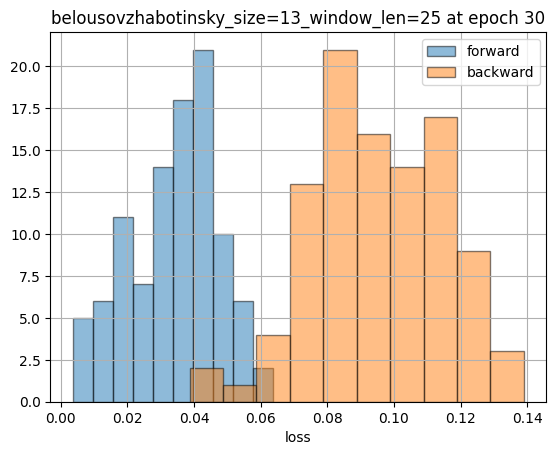

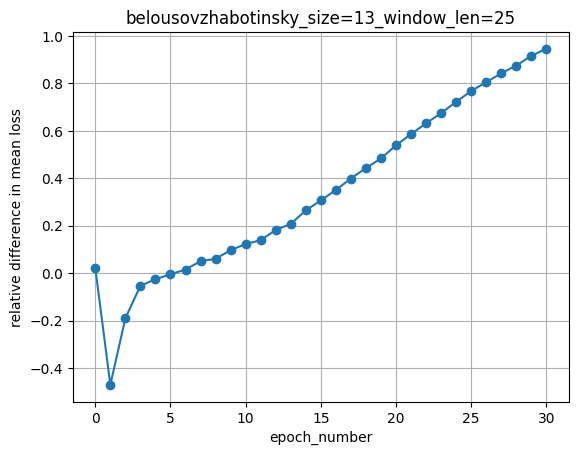

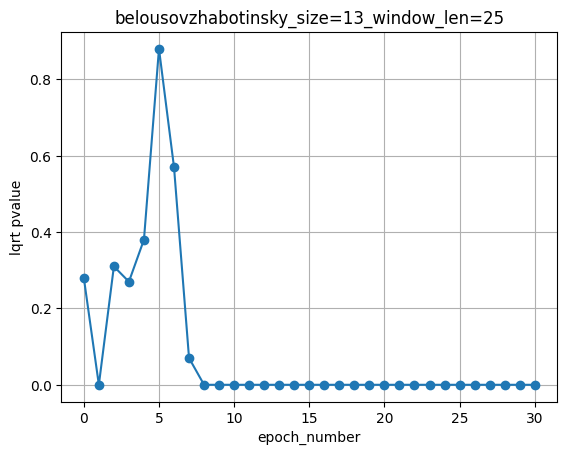

In [11]:
all_plots_for_datafile("20230507_distributions/belousovzhabotinsky_size=13_window_len=25.json")

## doublependulum_size=13_window_len=5

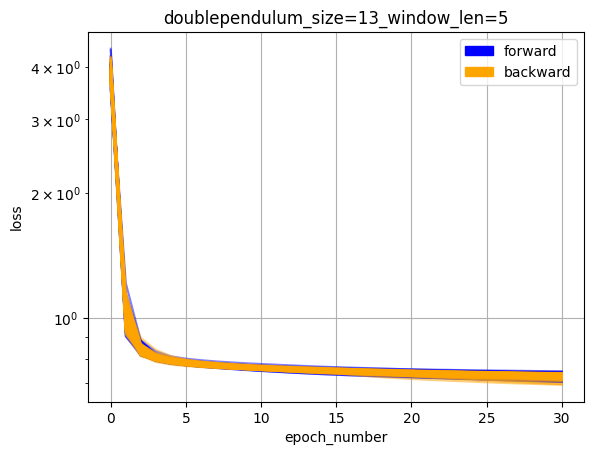

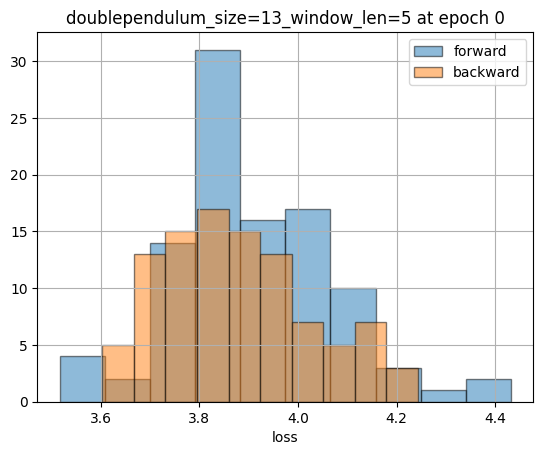

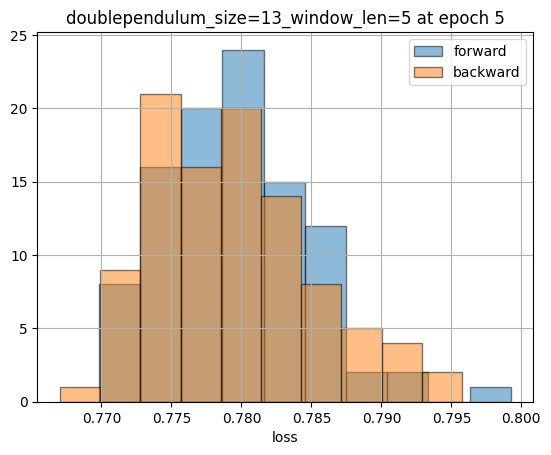

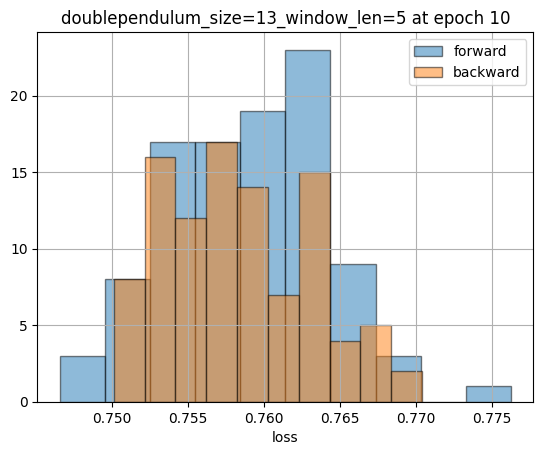

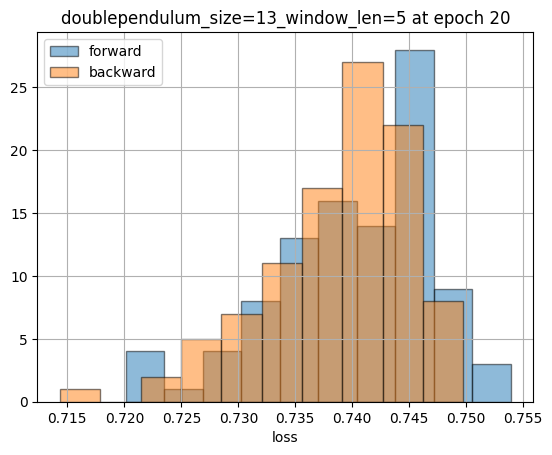

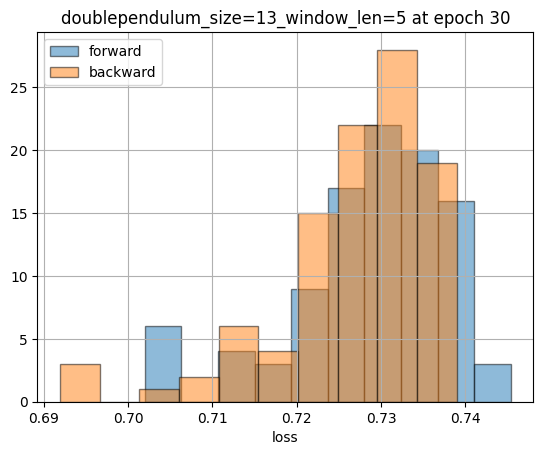

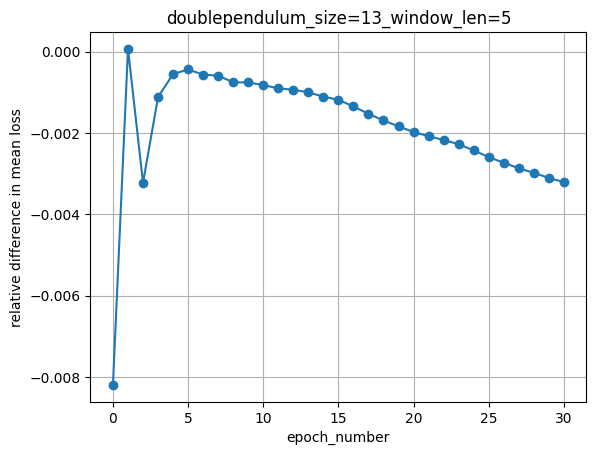

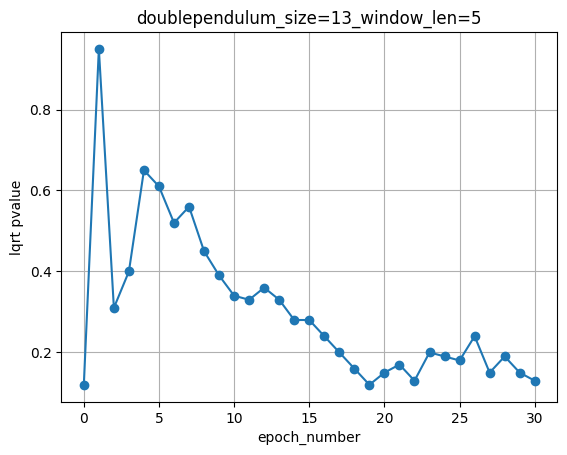

In [12]:
all_plots_for_datafile("20230507_distributions/doublependulum_size=13_window_len=5.json")

## All relmeandiffs in one plot

In [21]:
root, _, files = next(os.walk("20230507_distributions/"))
files = [os.path.join(root, f) for f in files if "friction" not in f and "damped" not in f]
loss_distributions = [LossDistribution(path) for path in files]
files

['20230507_distributions/doublependulum_size=13_window_len=5.json',
 '20230507_distributions/doublependulum_size=13_window_len=12.json',
 '20230507_distributions/kepler_size=13_window_len=5.json',
 '20230507_distributions/lorenz_size=13_window_len=5.json',
 '20230507_distributions/kepler_size=13_window_len=12.json',
 '20230507_distributions/belousovzhabotinsky_size=13_window_len=25.json',
 '20230507_distributions/kepler_size=13_window_len=25.json',
 '20230507_distributions/belousovzhabotinsky_size=13_window_len=5.json',
 '20230507_distributions/lorenz_size=13_window_len=25.json',
 '20230507_distributions/doublependulum_size=13_window_len=25.json',
 '20230507_distributions/lorenz_size=13_window_len=12.json',
 '20230507_distributions/belousovzhabotinsky_size=13_window_len=12.json']

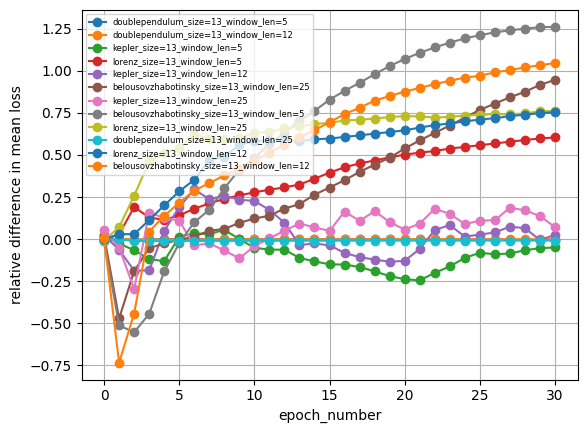

In [22]:
def plot_relmeandiffs(loss_distributions: List[LossDistribution]) -> None:
    for l in loss_distributions:
        plt.plot(l.relmeandiff_all(), "o-", label=l.label)    
    plt.grid()
    plt.xlabel("epoch_number")
    plt.ylabel("relative difference in mean loss")
    plt.legend(prop={"size":6})
    plt.show()
    
plot_relmeandiffs(loss_distributions)

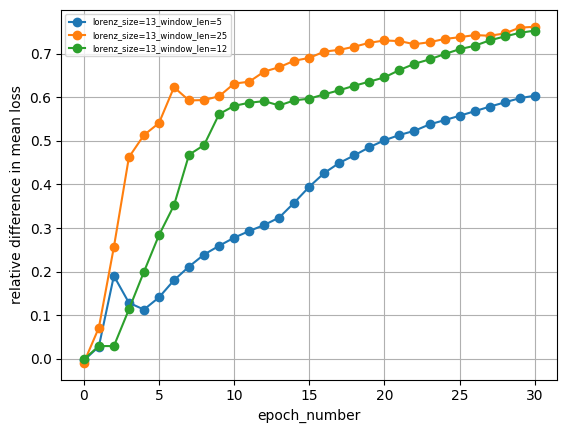

In [23]:
plot_relmeandiffs([l for l in loss_distributions if "lorenz" in l.filepath])

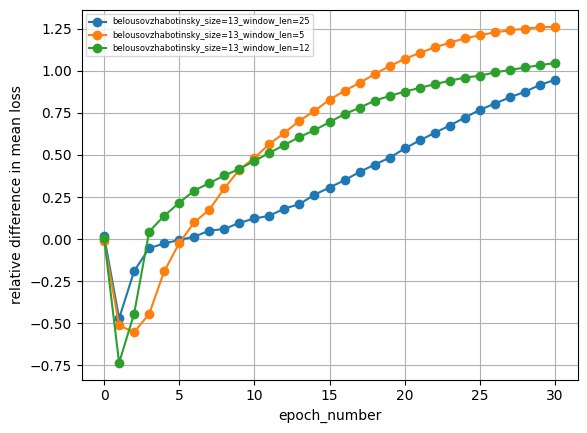

In [24]:
plot_relmeandiffs([l for l in loss_distributions if "belousov" in l.filepath])

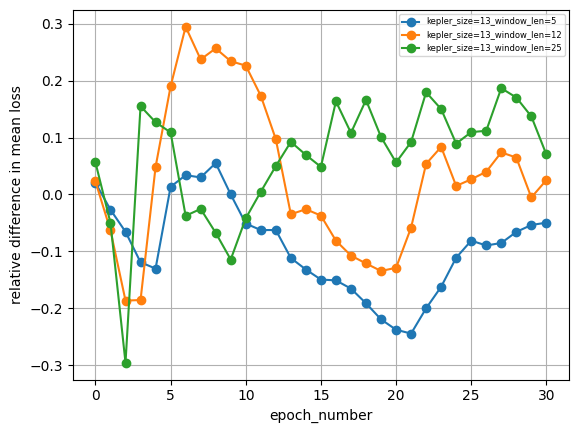

In [25]:
plot_relmeandiffs([l for l in loss_distributions if "kepler" in l.filepath])

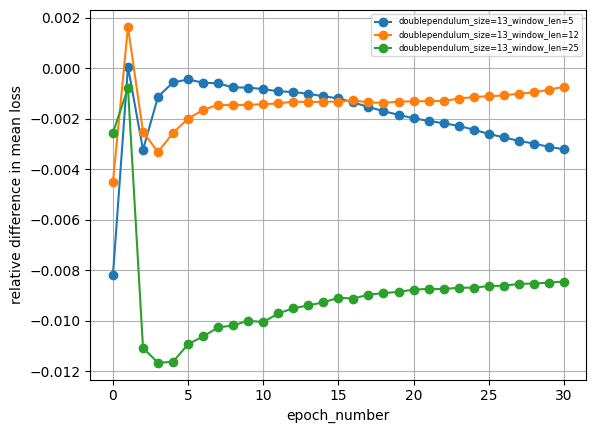

In [26]:
plot_relmeandiffs([l for l in loss_distributions if "doublependulum" in l.filepath])